In [1]:
from tqdm import tqdm
import CLAMS as clams
import numpy as np
import json



In [ ]:
with open("../scatterplots/sampling/sampled_datasets.json", "r") as f:
	sampled_datasets = json.load(f)

cs = clams.ClusterAmbiguity()
amb_list = []
for i, dataset in tqdm(enumerate(sampled_datasets)):
	splot = np.load(f"../scatterplots/scatterplots/{dataset}")
	try:
		ambiguity = cs.fit(splot)
		amb_list.append(ambiguity)
	except:
		amb_list.append(None)

amb_list = np.array(amb_list)
np.save("../scatterplots/sampling/ambiguity.npy", amb_list)

In [2]:
removing_list = [
	"hepatitis_tsne_17", "spectf_heart_tsne_1", "world12d_densmap_5", "ph_recognition_isomap_14", "dermatology_isomap_18", "statlog_image_segmentation_lle_5", "statlog_image_segmentation_umap_2", "human_stress_detection_tsne_17",
	"magic_gamma_telescope_rp_0", "human_stress_detection_tsne_9", "turkish_music_emotion_densmap_13", "fashion_mnist_rp_3", "classification_in_asteroseismology_tsne_15", "imdb_lle_1", "classification_in_asteroseismology_tsne_2",
	"smoker_condition_densmap_17", "fraud_detection_bank_isomap_8", "spambase_lle_3", "credit_risk_classification_lle_8", "diabetic_retinopathy_debrecen_isomap_4", "diabetic_retinopathy_debrecen_rp_7", "imdb_isomap_1", "spambase_lle_0",
	"optical_recognition_of_handwritten_digits_densmap_11", "spectf_heart_tsne_4", "predicting_pulsar_star_umap_9", "microbes_tsne_7", "magic_gamma_telescope_umap_1", "raisin_tsne_5", "diabetic_retinopathy_debrecen_lle_18",
	"predicting_pulsar_star_tsne_6", "htru2_tsne_9", "siberian_weather_stats_umap_2", "taiwanese_bankruptcy_prediction_umap_7", "optical_recognition_of_handwritten_digits_densmap_5", "banknote_authentication_rp_0", "iris_tsne_4", 
	"epileptic_seizure_recognition_lle_5", "credit_risk_classification_umap_11", "fashion_mnist_densmap_2", "taiwanese_bankruptcy_prediction_umap_17", "fashion_mnist_umap_14", "pen_based_recognition_of_handwritten_digits_umap_10",
	"pen_based_recognition_of_handwritten_digits_densmap_6", "fraud_detection_bank_densmap_7", "pen_based_recognition_of_handwritten_digits_umap_17"
]


In [18]:
amb_list = np.load("../scatterplots/sampling/ambiguity.npy", allow_pickle=True)
with open("../scatterplots/sampling/sampled_datasets.json", "r") as f:
	sampled_datasets = np.array(json.load(f))

sampled_datasets = sampled_datasets[amb_list != None].tolist()
amb_list = amb_list[amb_list != None]

for dataset in removing_list:
	idx = sampled_datasets.index(dataset + ".npy")
	amb_list = np.delete(amb_list, idx)
	sampled_datasets.remove(dataset + ".npy")

with open("../scatterplots/sampling/sampled_datasets_manual_sample.json", "w") as f:
	json.dump(sampled_datasets, f)



['iris_umap_6.npy'
 'pen_based_recognition_of_handwritten_digits_tsne_7.npy'
 'seismic_bumps_umap_1.npy'
 'pen_based_recognition_of_handwritten_digits_tsne_1.npy'
 'ph_recognition_densmap_8.npy' 'weather_densmap_2.npy'
 'pen_based_recognition_of_handwritten_digits_densmap_13.npy'
 'cardiovascular_study_densmap_1.npy' 'hate_speech_densmap_3.npy'
 'pen_based_recognition_of_handwritten_digits_densmap_17.npy'
 'seismic_bumps_umap_14.npy' 'statlog_image_segmentation_tsne_8.npy'
 'ph_recognition_umap_3.npy'
 'optical_recognition_of_handwritten_digits_umap_0.npy'
 'mammographic_mass_tsne_14.npy'
 'pen_based_recognition_of_handwritten_digits_umap_15.npy'
 'dermatology_isomap_5.npy' 'statlog_image_segmentation_tsne_13.npy'
 'seismic_bumps_umap_17.npy' 'statlog_image_segmentation_tsne_2.npy'
 'ph_recognition_densmap_10.npy' 'coil20_densmap_16.npy'
 'ph_recognition_densmap_7.npy'
 'pen_based_recognition_of_handwritten_digits_umap_18.npy'
 'crowdsourced_mapping_umap_2.npy'
 'statlog_image_segmenta

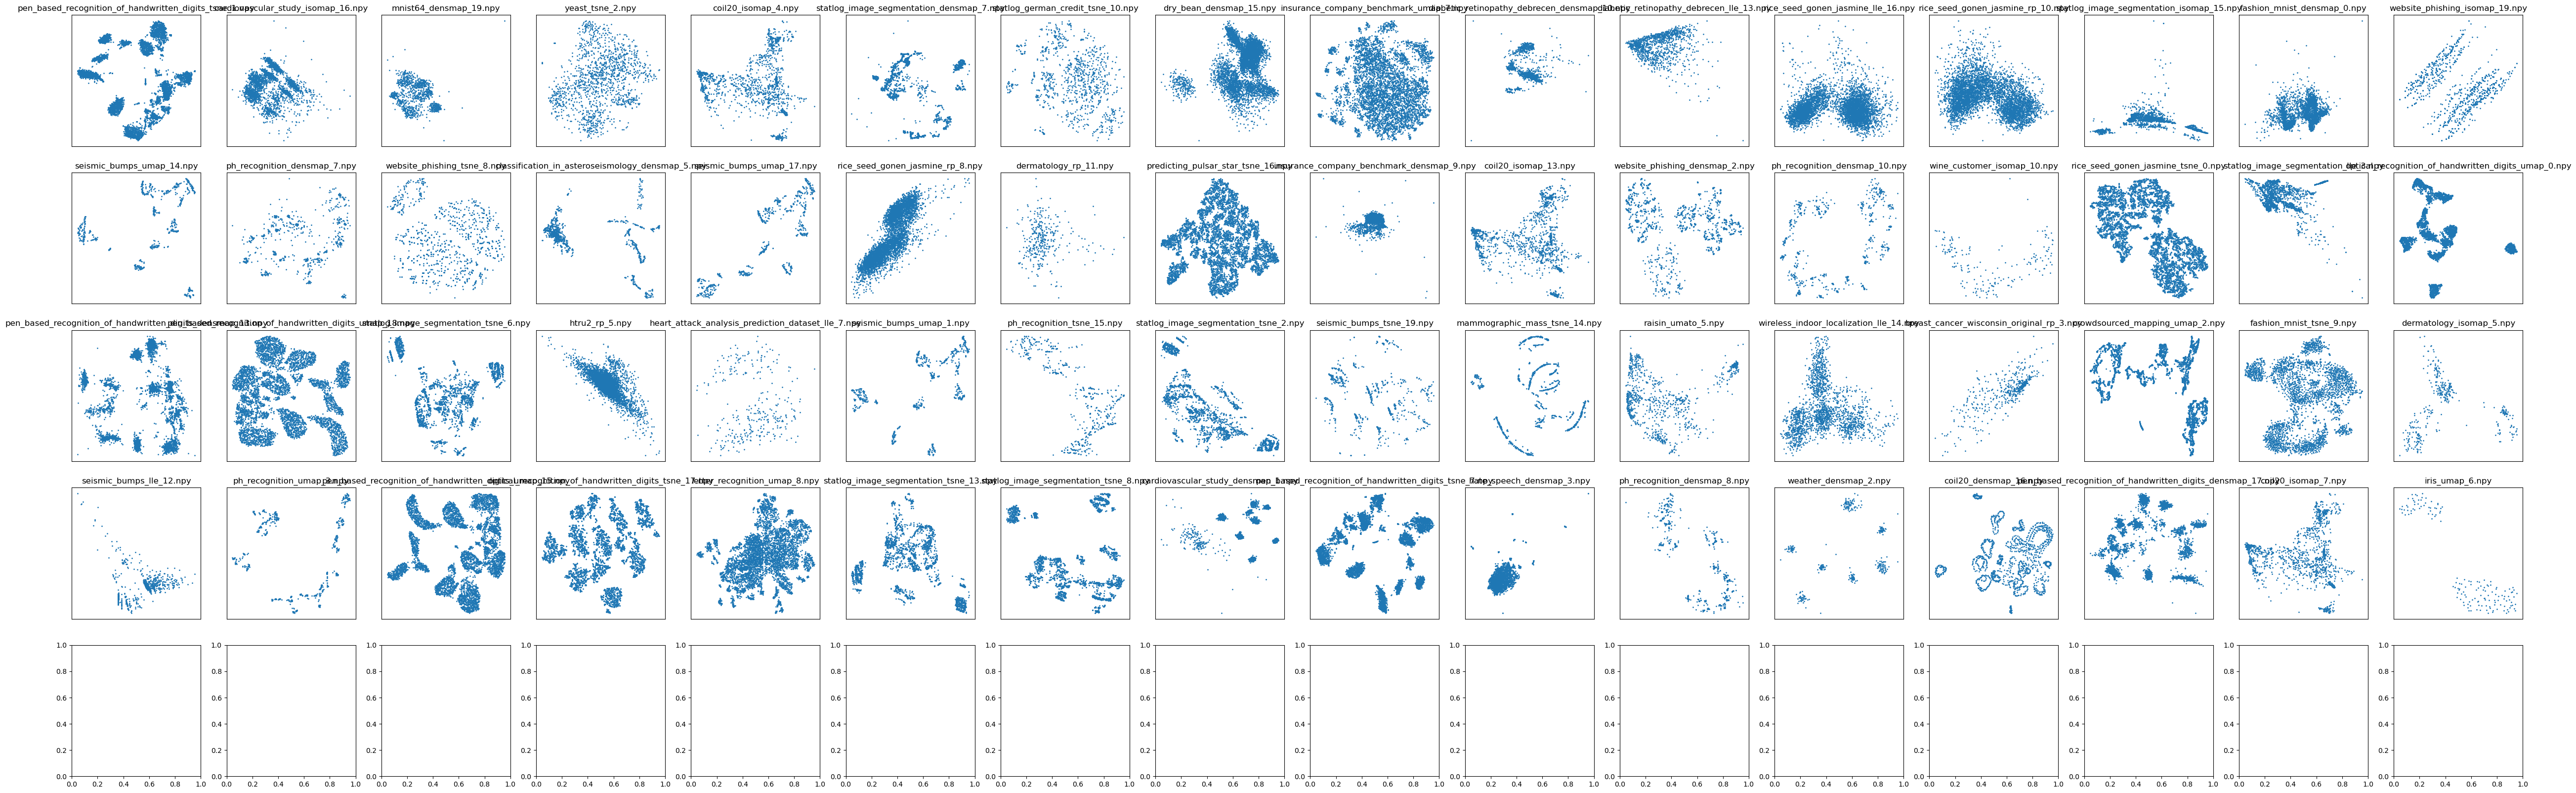

<Figure size 640x480 with 0 Axes>

In [20]:
## visualize in the order of ambiguity
import matplotlib.pyplot as plt

print(sampled_datasets)
sampled_datasets = np.array(sampled_datasets)


## sort based on ambiguity
sampled_datasets = sampled_datasets[np.argsort(amb_list)]

num_row = len(sampled_datasets) // 16 + 1
num_col = 16

fig, axs = plt.subplots(num_row, num_col, figsize=(4 * num_col, 4 * num_row))
for i, dataset in enumerate(sampled_datasets):
	splot = np.load(f"../scatterplots/scatterplots/{dataset}")
	axs[i // num_col, i % num_col].scatter(splot[:, 0], splot[:, 1], s=1)
	## remove ticks
	axs[i // num_col, i % num_col].set_xticks([])
	axs[i // num_col, i % num_col].set_yticks([])

	axs[i // num_col, i % num_col].set_title(f"{dataset}")

	with open(f"../scatterplots/sampling/data/{dataset}.json", "w") as f:
		json.dump(splot.tolist(), f)


plt.savefig("../scatterplots/sampling/sampled_scatterplots_amb_ordered.png", dpi=500)
plt.show()
plt.clf()
